# 직원 이직 여부 예측
![](https://github.com/Jangrae/img/blob/master/employee.png?raw=true)

## 데이터 정보
- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

## 데이터셋 불러오기

In [139]:
import numpy as np
import pandas as pd

In [140]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'

data = pd.read_csv(path)

In [141]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,No,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,No,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,No,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,No,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,No,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


## 데이터 전처리

* 주석을 상세하게 작성해주세요

<details><summary>Hint</summary>

- x, y 구분 필요
- train, test 구분 필요
- 데이터 타입 전처리 필요
- 데이터 인코딩 필요
- null값 확인 필요

In [142]:
# 결측치 확인
data.isna().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

In [143]:
# 결측치 처리 ==> 평균값으로 채움
fre_DistanceFromHome = data['DistanceFromHome'].value_counts().idxmax()
fre_NumCompaniesWorked = data['NumCompaniesWorked'].value_counts().idxmax()
data['DistanceFromHome'].fillna(fre_DistanceFromHome, inplace=True)
data['NumCompaniesWorked'].fillna(fre_NumCompaniesWorked, inplace=True)

In [144]:
# 결측치 확인
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1250 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

In [146]:
# 결측치 확인
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

In [147]:
# feature 삭제
# EmployeeNumber 사번은 불필요한 feature로 판단하여 삭제
# DistanceFromHome, NumCompaniesWorked은 형 변환에 어려움으로 인해 삭제
data.drop(['EmployeeNumber'], axis=1,inplace=True)

In [148]:
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [149]:
## 이직 여부가 더 중요한 것이라 생각하여 Yes 1로 설정
data.loc[ data[target]=='Yes' , target ] = 1
data.loc[ data[target]=='No' , target] = 0

## data type 전처리
data[target] = data[target].astype(float)

In [150]:
## 성별 남 : 1, 여 :0
## 야근 여부 yes : 1, NO : 0
## 출장 빈도 Travel_Rarely : 2 Travel_Frequently : 1, Non-Travel : 0 
## 결혼 상태 Divorced : 2, Married : 1, Single : 0
## 현재 부서 Research & Development :2, Sales : 1, Human Resources : 0
## JobRole (0~8)
## EducationField (0~5)

data.loc[ data['Gender']=='Male' , 'Gender' ] = 1
data.loc[ data['Gender']=='Female' , 'Gender'] = 0

data.loc[ data['OverTime']=='Yes' , 'OverTime'] = 1
data.loc[ data['OverTime']=='No' , 'OverTime'] = 0

data.loc[ data['BusinessTravel']=='Travel_Rarely' , 'BusinessTravel'] = 2
data.loc[ data['BusinessTravel']=='Travel_Frequently' , 'BusinessTravel'] = 1
data.loc[ data['BusinessTravel']=='Non-Travel' , 'BusinessTravel'] = 0

data.loc[ data['MaritalStatus']=='Divorced' , 'MaritalStatus'] = 2
data.loc[ data['MaritalStatus']=='Married' , 'MaritalStatus'] = 1
data.loc[ data['MaritalStatus']=='Single' , 'MaritalStatus'] = 0

data.loc[ data['Department']=='Research & Development' , 'Department'] = 2
data.loc[ data['Department']=='Sales' , 'Department'] = 1
data.loc[ data['Department']=='Human Resources' , 'Department'] = 0

data.loc[ data['JobRole']=='Sales Executive' , 'JobRole'] = 0
data.loc[ data['JobRole']=='Research Scientist' , 'JobRole'] = 1
data.loc[ data['JobRole']=='Laboratory Technician' , 'JobRole'] = 2
data.loc[ data['JobRole']=='Manufacturing Director' , 'JobRole'] = 3
data.loc[ data['JobRole']=='Healthcare Representative' , 'JobRole'] = 4
data.loc[ data['JobRole']=='Manager' , 'JobRole'] = 5
data.loc[ data['JobRole']=='Research Director' , 'JobRole'] = 6
data.loc[ data['JobRole']=='Sales Representative' , 'JobRole'] = 7
data.loc[ data['JobRole']=='Human Resources' , 'JobRole'] = 8

data.loc[ data['EducationField']=='Life Sciences' , 'EducationField'] = 0
data.loc[ data['EducationField']=='Medical' , 'EducationField'] = 1
data.loc[ data['EducationField']=='Marketing' , 'EducationField'] = 2
data.loc[ data['EducationField']=='Technical Degree' , 'EducationField'] = 3
data.loc[ data['EducationField']=='Other' , 'EducationField'] = 4
data.loc[ data['EducationField']=='Human Resources' , 'EducationField'] = 5

## data type 전처리
data['OverTime'] = data['OverTime'].astype(float)
data['Gender'] = data['Gender'].astype(float)
data['BusinessTravel'] = data['BusinessTravel'].astype(float)
data['MaritalStatus'] = data['MaritalStatus'].astype(float)
data['Department'] = data['Department'].astype(float)
data['JobRole'] = data['JobRole'].astype(float)
data['EducationField'] = data['EducationField'].astype(float)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   float64
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   float64
 3   Department                1250 non-null   float64
 4   DistanceFromHome          1250 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   float64
 7   EnvironmentSatisfaction   1250 non-null   int64  
 8   Gender                    1250 non-null   float64
 9   JobInvolvement            1250 non-null   int64  
 10  JobRole                   1250 non-null   float64
 11  JobSatisfaction           1250 non-null   int64  
 12  MaritalStatus             1250 non-null   float64
 13  MonthlyIncome             1250 non-null   int64  
 14  NumCompa

In [152]:
# x, y 구분
target = 'Attrition'
x = data.drop(target, axis=1)
y = data.loc[:,target]

x.shape, y.shape

((1250, 24), (1250,))

In [153]:
# train / test set 구분
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [154]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1000, 24), (250, 24), (1000,), (250,))

## 모델링

1. 전처리에서 제외한 feature를 제외한, 다른 feature는 반드시 모두 사용하셔야 합니다.
2. locally connected layer를 최소 4개 이상 만드세요.
3. 모델 구조 시각화까지 해주면 좋습니다.
4. 학습 횟수는 최대 25번까지만.
---
### **locally하게 연결한 구성 의도를 반드시 상세하게 남겨주세요 (상황 가정을 해서라도!)** 
### **주석 역시 상세하게 남겨주세요**

### Locally connected layer를 구성하기 위한 feature 설정

In [155]:
# 개인 특징 : 나이, 교육수준, 전공, 성별, 결혼상태
tr_personal = x_train.loc[ : , ['Age', 'Education','EducationField','Gender','MaritalStatus'] ]
te_personal = x_test.loc[ : , ['Age', 'Education','EducationField','Gender','MaritalStatus'] ]


In [156]:
# 회사 외부 : 집과 직장 사이의 거리 (마일), 현재까지 근무한 회사 수

tr_outdoor = x_train.loc[ : , ['DistanceFromHome','NumCompaniesWorked'] ]
te_outdoor = x_test.loc[ : ,  ['DistanceFromHome','NumCompaniesWorked'] ]

In [157]:
# 수입 : 월급 , 인상률, 스톡옵션
tr_income = x_train.loc[ : , ['MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel'] ]
te_income = x_test.loc[ : , ['MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel'] ]


In [158]:
# 설문 조사 : 직무 만족도, 근무환경에 대한 만족도, 동료와의 관계 만족도, 워라밸 , 직무 적극성-참여도

tr_survey = x_train.loc[ : , ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance','JobInvolvement'] ]
te_survey = x_test.loc[ : , ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance','JobInvolvement'] ]


In [159]:
# 기타
tr_etc = x_train.loc[:,['BusinessTravel','Department','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager' ]]
te_etc = x_test.loc[:,['BusinessTravel','Department','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager' ]]

### 모델 코드 작성

In [160]:
x_train.shape, y_train.shape

((1000, 24), (1000,))

In [161]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Add, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [162]:
# 1번. 세션 클리어
clear_session()

# 2번. 모델의 레이어를 엮기!
# Locally connected layer를 구성하지 않은 feature 전체 입력
il_etc = Input(shape=(9,), name='etc')

il_personal = Input(shape=(5,), name='personal')
hl_personal = Dense(12, activation='relu', name='hl_personal')(il_personal)

il_outdoor = Input(shape=(2,), name='outdoor')
hl_outdoor = Dense(12, activation='relu', name='hl_outdoor')(il_outdoor)

il_income = Input(shape=(3,), name='income')
hl_income = Dense(12, activation='relu', name='hl_income')(il_income)

il_survey = Input(shape=(5,), name='survey')
hl_survey = Dense(12, activation='relu', name='hl_survey')(il_survey)

al = Add(name='Add_layer')([hl_personal, hl_outdoor, hl_income, hl_survey])

cl = Concatenate()([al, il_etc])

hl = Dense(128, activation='relu', name='hidden_128')(cl)
ol = Dense(1, activation='sigmoid', name='output')(hl)

# 3. 모델 시작과 끝 지정
model = Model([il_etc, il_personal, il_outdoor, 
               il_income, il_survey], ol)

# 4. 컴파일
model.compile(loss=binary_crossentropy, metrics=['accuracy'], optimizer=Adam())

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 personal (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 outdoor (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 income (InputLayer)            [(None, 3)]          0           []                               
                                                                                                  
 survey (InputLayer)            [(None, 5)]          0           []                               
                                                                                              

### 모델 구조 시각화

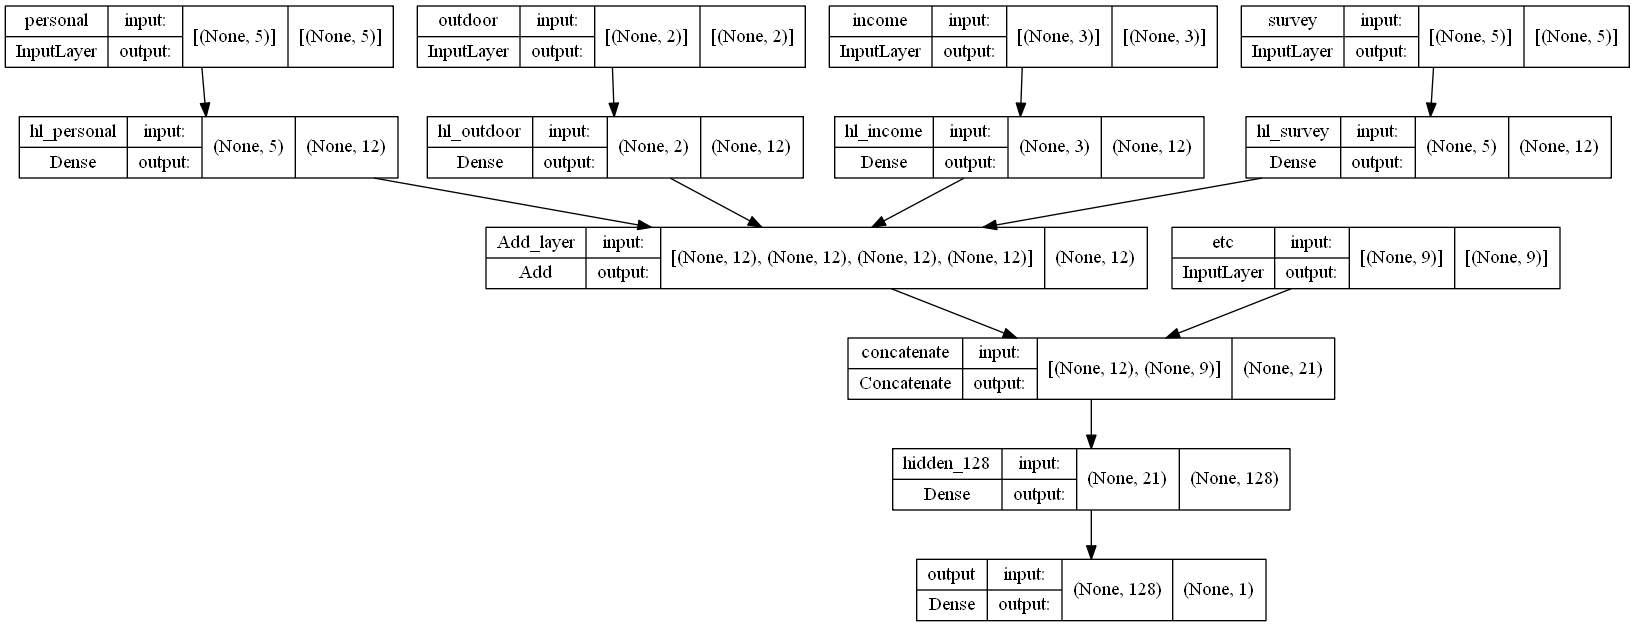

In [163]:
# 모델 시각화
plot_model(model, show_shapes=True)

### 모델 학습

In [164]:
# Early Stopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [165]:
x_train.shape

(1000, 24)

In [166]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 412 to 893
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   BusinessTravel            1000 non-null   float64
 2   Department                1000 non-null   float64
 3   DistanceFromHome          1000 non-null   float64
 4   Education                 1000 non-null   int64  
 5   EducationField            1000 non-null   float64
 6   EnvironmentSatisfaction   1000 non-null   int64  
 7   Gender                    1000 non-null   float64
 8   JobInvolvement            1000 non-null   int64  
 9   JobRole                   1000 non-null   float64
 10  JobSatisfaction           1000 non-null   int64  
 11  MaritalStatus             1000 non-null   float64
 12  MonthlyIncome             1000 non-null   int64  
 13  NumCompaniesWorked        1000 non-null   float64
 14  OverTim

In [167]:
tr_list = [tr_etc, tr_personal, tr_outdoor, 
           tr_income, tr_survey]
te_list = [te_etc, te_personal, te_outdoor, 
           te_income, te_survey]

In [168]:
# 학습하기
model.fit([tr_etc, tr_personal, tr_outdoor, 
           tr_income, tr_survey], y_train, validation_split=0.15, 
          epochs=25, verbose=1, callbacks=[es]) 



Epoch 1/25
27/27 [==============================] - 1s 10ms/step - loss: 10.6161 - accuracy: 0.7600 - val_loss: 1.2301 - val_accuracy: 0.3067
Epoch 2/25
27/27 [==============================] - 0s 3ms/step - loss: 10.6347 - accuracy: 0.7671 - val_loss: 7.4141 - val_accuracy: 0.8467
Epoch 3/25
27/27 [==============================] - 0s 3ms/step - loss: 4.4361 - accuracy: 0.7694 - val_loss: 5.0592 - val_accuracy: 0.8467
Epoch 4/25
27/27 [==============================] - 0s 3ms/step - loss: 5.2942 - accuracy: 0.7635 - val_loss: 7.5345 - val_accuracy: 0.8467
Epoch 5/25
27/27 [==============================] - 0s 3ms/step - loss: 5.9667 - accuracy: 0.7765 - val_loss: 10.5550 - val_accuracy: 0.1533
Epoch 6/25
27/27 [==============================] - 0s 3ms/step - loss: 3.2676 - accuracy: 0.7471 - val_loss: 1.6079 - val_accuracy: 0.4733
Epoch 7/25
27/27 [==============================] - 0s 3ms/step - loss: 2.4398 - accuracy: 0.7600 - val_loss: 1.0050 - val_accuracy: 0.7200
Epoch 8/25
27/27

### 모델 예측

In [169]:
y_pred = model.predict(te_list)
                        
y_pred[:5].reshape(-1)

array([1.4208214e-10, 3.1066552e-06, 1.8026363e-27, 1.4700525e-05,
       1.1062425e-06], dtype=float32)

In [170]:
for idx, val in enumerate(y_pred) :
    if y_pred[idx] >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0
y_pred[:5].reshape(-1)

array([0., 0., 0., 0., 0.], dtype=float32)

### 모델 평가

In [171]:
model.evaluate(te_list, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 3.5773 - accuracy: 0.8320


[3.5772974491119385, 0.8320000171661377]

In [172]:
for idx, val in enumerate(y_pred) :
    if y_pred[idx] >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0

In [173]:
y_pred[:5].reshape(-1)

array([0., 0., 0., 0., 0.], dtype=float32)

In [174]:
from sklearn.metrics import classification_report

In [175]:
print( classification_report(y_test, y_pred , target_names=['Attrition_No' , 'Attrition_Yes']))

               precision    recall  f1-score   support

 Attrition_No       0.83      1.00      0.91       207
Attrition_Yes       1.00      0.02      0.05        43

     accuracy                           0.83       250
    macro avg       0.92      0.51      0.48       250
 weighted avg       0.86      0.83      0.76       250



In [176]:
## 정확도 : 83%
## Attrition_No precision : 83%
## Attrition_No recall : 100%
## Attrition_Yes precision : 100%
## Attrition_Yes recall : 2% => 이직한 직원의 수가 이직하지 않은 직원의 수와 큰 차이가 나기 때문에 제대로된 예측 실패

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오.
---
### hidden layer 2개를 사용한 multilayer perceptron 구조와 비교하시오.

In [185]:
# 1번. 세션 클리어
clear_session()

# 2번. 모델의 레이어를 엮기!
# Locally connected layer를 구성하지 않은 feature 전체 입력
il_full = Input(shape=(24,), name='input')
hl = Dense(8, activation='relu', name='hl1')(il_full)
hl = Dense(8, activation='relu', name='hl2')(hl)
ol = Dense(1, activation='sigmoid', name='output')(hl)

# 3. 모델 시작과 끝 지정
model = Model(il_full, ol)

# 4. 컴파일
model.compile(loss=binary_crossentropy, metrics=['accuracy'], optimizer=Adam())

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 24)]              0         
                                                                 
 hl1 (Dense)                 (None, 8)                 200       
                                                                 
 hl2 (Dense)                 (None, 8)                 72        
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


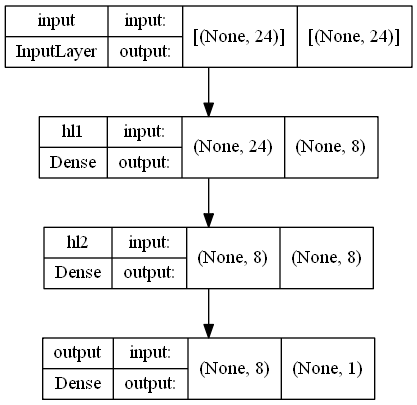

In [186]:
# 모델 시각화
plot_model(model, show_shapes=True)

In [187]:
# 모델 학습
# Early Stopping
# es = EarlyStopping(monitor='val_loss',
#                    min_delta=0,
#                    patience=30,
#                    verbose=1,
#                    restore_best_weights=True)

In [188]:
# 학습하기
model.fit(x_train, y_train, validation_split=0.15, 
          epochs=25, verbose=1, callbacks=[es]) 



Epoch 1/25
27/27 [==============================] - 1s 8ms/step - loss: 323.3826 - accuracy: 0.1576 - val_loss: 145.3043 - val_accuracy: 0.1533
Epoch 2/25
27/27 [==============================] - 0s 3ms/step - loss: 39.7425 - accuracy: 0.5435 - val_loss: 19.3220 - val_accuracy: 0.8467
Epoch 3/25
27/27 [==============================] - 0s 2ms/step - loss: 8.8601 - accuracy: 0.8424 - val_loss: 5.1617 - val_accuracy: 0.8467
Epoch 4/25
27/27 [==============================] - 0s 3ms/step - loss: 1.4708 - accuracy: 0.7576 - val_loss: 1.1395 - val_accuracy: 0.8533
Epoch 5/25
27/27 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.7541 - val_loss: 0.7903 - val_accuracy: 0.7733
Epoch 6/25
27/27 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7518 - val_loss: 0.8500 - val_accuracy: 0.8200
Epoch 7/25
27/27 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.7612 - val_loss: 0.7122 - val_accuracy: 0.7533
Epoch 8/25
27/

In [189]:
y_pred = model.predict(x_test)
                        
y_pred[:5].reshape(-1)

array([0.14646712, 0.28454256, 0.0950104 , 0.40806177, 0.4107754 ],
      dtype=float32)

In [190]:
for idx, val in enumerate(y_pred) :
    if y_pred[idx] >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0
y_pred[:5].reshape(-1)

array([0., 0., 0., 0., 0.], dtype=float32)

In [191]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7840


[0.49118560552597046, 0.7839999794960022]

In [192]:
print( classification_report(y_test, y_pred , target_names=['Attrition_No' , 'Attrition_Yes']))

               precision    recall  f1-score   support

 Attrition_No       0.83      0.93      0.88       207
Attrition_Yes       0.18      0.07      0.10        43

     accuracy                           0.78       250
    macro avg       0.50      0.50      0.49       250
 weighted avg       0.72      0.78      0.74       250

